In [1]:
%matplotlib notebook

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [5]:
def debug(tx):
    debug_text.set_text(tx)

def mse(array, value):
    return np.sum(np.square(array - value), axis=1)
    
def find_nearest(array, value):
    idx = mse(array, value).argmin()
    return idx
    
def motion_notify_event(event):
    clicked_coord = np.array([event.xdata, event.ydata])
    dataind = find_nearest(z, clicked_coord)
    axi = fig.add_subplot(122)
    axi.imshow(data[dataind, :, :], cmap='gray')
    debug('idx: %s' % str(dataind))
    return True

In [6]:
dataset = datasets.load_digits()

In [7]:
data = dataset['images']
labels = dataset['target']

In [8]:
data.shape

(1797, 8, 8)

In [9]:
labels.shape

(1797,)

In [10]:
n, h, w = data.shape

In [11]:
pca = PCA(n_components=2)

In [12]:
z = pca.fit_transform(data.reshape((n, h * w)))

In [13]:
z.shape

(1797, 2)

In [14]:
x = z[:, 0]
y = z[:, 1]

<IPython.core.display.Javascript object>


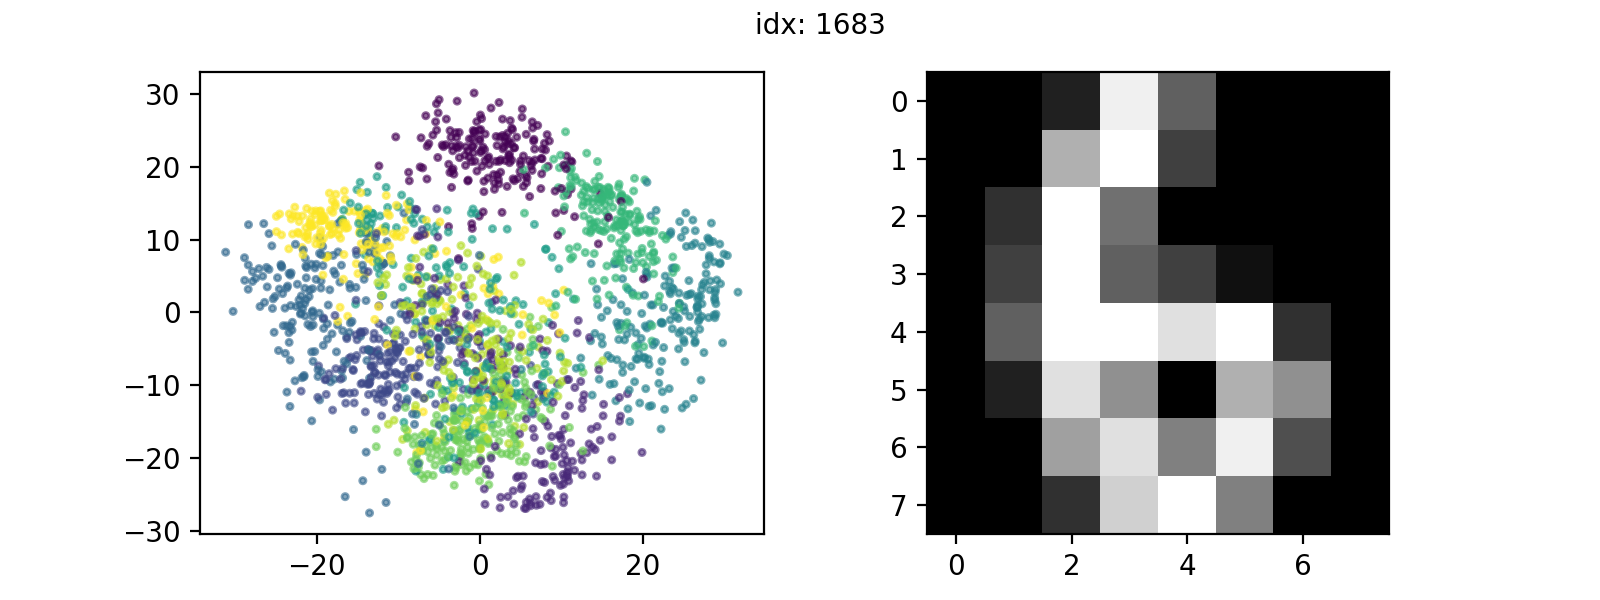

7

In [17]:
%matplotlib notebook

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(121)
ax.scatter(x, y, s=5, c=labels, alpha=0.6)

# debug text is used to display the index of the data point
debug_text = ax.text(1.1, 1.1,'', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)

#fig.canvas.mpl_connect('button_press_event', motion_notify_event)
fig.canvas.mpl_connect('motion_notify_event', motion_notify_event)